In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [94]:
m = 1000
n = 2
c = 2
X = np.random.rand(m, n)
y = np.where(2*X[:,0]+X[:,1]<1.5, 1, 0)

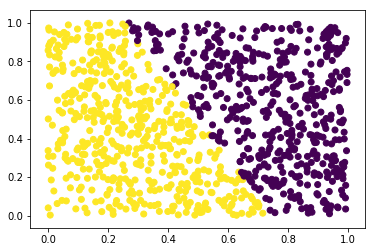

In [95]:
plt.scatter(X[:,0],X[:,1],c=y)

In [96]:
X_train = np.insert(X, 0, values=1., axis=1)
y_train = y[:, np.newaxis]
W = np.random.randn(n+1, c)

In [97]:
rate = 1.0

In [98]:
Ls = []
for i in range(2000):
    H = X_train @ W
    H_exp = np.exp(H)
    H_exp_sum = np.sum(H_exp, axis=1, keepdims=True)
    H_p = H_exp / H_exp_sum
    F = H_p[np.arange(m), y]
    L = np.sum(-np.log(F))/m
    
    if i==0:
        print(L)
    
    Ls.append(L)
    
    H_p[np.arange(m), y] -= 1
    dH = H_p/m
    dW = X_train.T @ dH
    W -= rate*dW

1.107494275329379


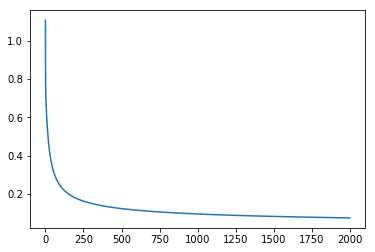

In [99]:
plt.plot(Ls)

In [100]:
acc = np.argmax(X_train@W, axis=1)==y
np.sum(acc)/1000

0.996

In [101]:
# 权重理论比值为 -1.5：2：1
W_val = W[:,0]-W[:,1]
W_val / W_val[2]

array([-1.55074323,  2.10026805,  1.        ])

In [102]:
xp, yp = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
xyp = np.vstack([xp.flatten(), yp.flatten()]).T
xyp = np.insert(xyp, 0, 1., axis=1)
zp = np.argmax(xyp @ W, axis=1).reshape(50, 50)

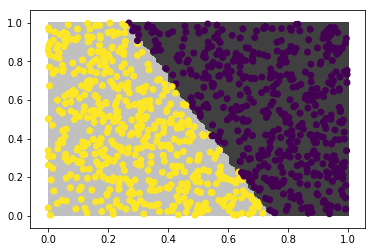

In [103]:
plt.contourf(xp, yp, zp, [0, 0.5, 1], cmap=plt.cm.binary_r)
plt.scatter(X[:,0],X[:,1],c=y)